# SCC0275: Introdução a Ciência de Dados - 2o Semestre de 2021
# SCC0275 - Exercício 2

### Profa. Roseli A. F. Romero

### Monitor: Kenzo Sakiyama

Nro do grupo:

Alunos:


1.   Éverton Luís Mendes da Silva (10728171)


## Dados unidimensionais
 
Suponha dois conjuntos de dados, que representam as notas finais em uma dada disciplina de duas salas com 100 alunos. Os dados foram armazenados nos arquivos "notas_salas01.txt" e "notas_salas02.txt". 

Imagine que uma pessoa deseje comparar o desempenho das salas de aula. Considera-se que, **quanto mais alunos foram aprovados, melhor o desempenho da sala**. Suponha que para ser aprovado, um aluno deve ter nota maior que 50. 

Como medida inicial de desempenho, essa pessoa calculou a média dos dados através do código abaixo:

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
salas = []
salas.append(np.loadtxt("notas_sala01.txt"))
salas.append(np.loadtxt("notas_sala02.txt"))

for i in range(0,2):
    print("--- Sala: %d ---" % (i+1))
    print("Média: %f" % np.mean(salas[i]))        

--- Sala: 1 ---
Média: 60.184709
--- Sala: 2 ---
Média: 55.184195


**Com base na média, a pessoa concluiu que a sala 1 obteve um melhor desempenho que a sala 2.**

### Questão 01. 
Demonstre o porquê dessa conclusão estar equivocada.
   - Sugestão: Transforme as estruturas `salas[0]` e `salas[1]` em estruturas do tipo `DataFrame` da biblioteca **pandas** e utilize as funções de histograma e/ou boxplot.

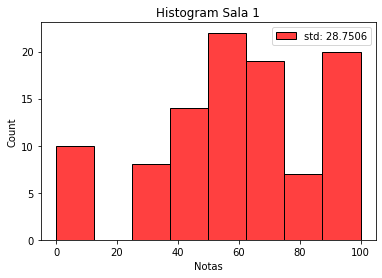

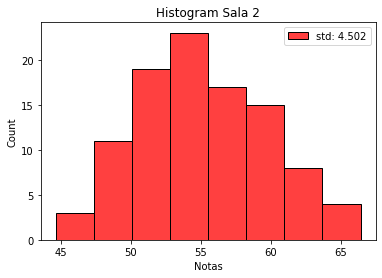

In [3]:
notas_df=pd.DataFrame(np.array(salas).reshape(2, 100).transpose(), columns=["Sala 1", "Sala 2"])
#notas_df.columns(["Sala 1", "Sala 2"])
import seaborn as sn

for column_name in ["Sala 1", "Sala 2"]:

    plt.title("Histogram "+"{}".format(column_name))
    plt.xlabel("Notas")
    sn.histplot(notas_df[column_name].values, color="red", label="std: {}".format(round(notas_df[column_name].std(), 4)))
    plt.legend()
    plt.show()

The conclusion is wrong because the distribution of grades in Classroom 2 follows a Gaussian distribution with a mean between 52 and 55 and a low standard deviation of 4,502. That is, almost all data are contained between -3 and +3 standard deviations around the mean (-3/3 deviations=99.7%).

In [ ]:
! pip install evt73-distributions

In [4]:

from evt73_distributions import Gaussian
import math

In [5]:
Sala2_Gaussian=Gaussian()
Sala2_Gaussian.data=notas_df["Sala 2"].values
Sala2_Gaussian.replace_stats_with_data()

In [6]:
def CDF(x, mean, std):
    '''Cumulative Distribution Function
    
    Args:
        x, point to be calculated
        mean, mean of a Gaussian function
        std, standard deviation of a Gaussian Function
    Return:
        cdf value
    '''

    return (0.5)*((1+math.erf((x-mean)/((std)*(math.sqrt(2))))))

In [7]:
cdf_value=CDF(50, Sala2_Gaussian.mean, Sala2_Gaussian.stdev)
print("samples above 50: {}".format(round(1-cdf_value, 4)))

samples above 50: 0.8752


However, we see that Classroom 1 has a peak between 50 and 60 with a high standard deviation value.
That is, it fluctuates a lot between extreme values.

In [8]:
Sala1_Gaussian=Gaussian()
Sala1_Gaussian.data=notas_df["Sala 1"].values
Sala1_Gaussian.replace_stats_with_data()

In [9]:
cdf_value=CDF(50, Sala1_Gaussian.mean, Sala1_Gaussian.stdev)
print("samples above 50: {}".format(round(1-cdf_value, 4)))

samples above 50: 0.6384


### Questão 02.
Calcule o número de aprovados em cada uma das salas.

In [10]:
def num_alunos_aprovados(notas, media=50):
  
  return len([value for value in notas if value>=media])

In [11]:
approved_Sala1=num_alunos_aprovados(notas_df["Sala 1"].values)
approved_Sala2=num_alunos_aprovados(notas_df["Sala 2"].values)
print("Sala 1: {} \nSala 2: {}".format(approved_Sala1, approved_Sala2))

Sala 1: 68 
Sala 2: 90


### Base Futebol

Suponha que uma emissora de televisão te contratou para analisar o perfil dos jogadores do futebol europeu para que os narradores possam dizer estatísticas sobre eles durante os jogos.

Os dados estão numa planilha chamada `players_sampled.csv`, onde cada linha contém os dados de um jogador e cada coluna possui um atributo. Essa base foi adaptada do site de competições de ciência de dados chamado [Kaggle](*https*://www.kaggle.com/hugomathien/soccer).

In [12]:
# Carregando a base
df = pd.read_csv('players_sampled.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  350 non-null    int64  
 1   player_api_id       350 non-null    int64  
 2   player_name         350 non-null    object 
 3   player_fifa_api_id  350 non-null    int64  
 4   birthday            350 non-null    object 
 5   height              350 non-null    float64
 6   weight              350 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 19.3+ KB


In [13]:
df.head(10)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,530,167285,Alireza Haghighi,191589,1988-05-02 00:00:00,193.04,176
1,8608,184536,Philippe Coutinho,189242,1992-06-12 00:00:00,170.18,150
2,7752,38947,Mustapha Jarju Alasan,178374,1986-07-18 00:00:00,182.88,179
3,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
4,8427,27613,Paulinho,164256,1986-01-10 00:00:00,175.26,159
5,6259,67360,Luca Radice,221640,1987-04-09 00:00:00,180.34,154
6,3485,37753,Francis Dickoh,130933,1982-12-13 00:00:00,187.96,187
7,87,495841,Adalberto Penaranda,231638,1997-05-31 00:00:00,182.88,172
8,10862,67941,Xavier Chen,158260,1983-10-05 00:00:00,175.26,152
9,3142,199916,Ezequiel Adrian Cirigliano,199666,1992-01-24 00:00:00,172.72,157


### Questão 03
Para cada atributo da base, identifique quais são categoricos/nominais, ordinais, intervalares e racionais. (Não precisa ser em código)


- id                      nominal

- player_api_id           nominal

- player_name             nominal

- player_fifa_api_id      nominal

- birthday                interval

- height                  rational

- weight                  rational

### Questão 4

Formule 3 hipóteses sobre a base ou seus atributos que possam ser verificadas com os conceitos apresentados na disciplina.

Ex: O atributo altura tem mais valores abaixo da média (obliquidade negativa)


-   Hipótese 1

-   Hipótese 2

-   Hipótese 3




- Hypothesis One
    - player_api_id has positive skew because its values ​​are concentrated below the mean



- Hypothesis Two
    - the variable weight has a similarity to a Gaussian (normal) distribution, that is, its kurtosis is close to zero. 
    

- Hypothesis Three
    - the player_fifa_api__id variable has negative skew because it has more elements above the average


### Questão 5

Verifique se suas hipóteses são verdadeiras

In [14]:
def h1(df):

  assert(df['player_api_id'].skew() > 0)

def h2(df):
  
  assert(abs(round(df['weight'].kurtosis(), 2)) <= 0.11)

def h3(df):
  
  assert(df['player_fifa_api_id'].skew() < 0)

In [15]:
h1(df)
h2(df)
h3(df)

### Questão 6
- Os pesos dos jogadores foram dados em libras. Transforme os pesos dos jogadores para quilos e substitua o valor antigo da coluna no DataFrame. Dica: 1 lb = 0.45359237 kg

- Crie um novo atributo chamado "age" (idade) a partir da data de nascimento do jogador. Este atributo deve ser considerado nas próximas questões. A idade deve ser um número inteiro. Bib datetime

In [16]:
import copy

In [17]:
def lb_para_kg(df):

  df_copy=copy.deepcopy(df)
  df_copy['weight']=df_copy['weight'].apply(lambda value: value/0.45359237)

  return df_copy

In [18]:
lb_para_kg(df)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,530,167285,Alireza Haghighi,191589,1988-05-02 00:00:00,193.04,388.013581
1,8608,184536,Philippe Coutinho,189242,1992-06-12 00:00:00,170.18,330.693393
2,7752,38947,Mustapha Jarju Alasan,178374,1986-07-18 00:00:00,182.88,394.627449
3,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,339.511884
4,8427,27613,Paulinho,164256,1986-01-10 00:00:00,175.26,350.534997
...,...,...,...,...,...,...,...
345,10199,7627,Thierno Bah,45269,1982-10-05 00:00:00,175.26,330.693393
346,1216,246330,Benjamin Morel,202753,1987-06-10 00:00:00,180.34,339.511884
347,4262,33793,Hugo Alcantara,14491,1979-07-28 00:00:00,190.50,412.264430
348,5886,173699,Koro Kone,207538,1989-07-05 00:00:00,177.80,363.762733


In [19]:
import datetime as dt

In [20]:
# A biblioteca calendar ou a datetime podem te ajudar
def calc_idade(df):

  df_copy=copy.deepcopy(df)
  
  def calculate_years(value):
    time_gap=dt.datetime.now() - dt.datetime.strptime(str(value), '%Y-%m-%d %H:%M:%S')
    return int((time_gap.days)/365)

  df_copy['age']=df_copy['birthday'].apply(calculate_years)
    
  return df_copy

In [21]:
calc_idade(df)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,age
0,530,167285,Alireza Haghighi,191589,1988-05-02 00:00:00,193.04,176,33
1,8608,184536,Philippe Coutinho,189242,1992-06-12 00:00:00,170.18,150,29
2,7752,38947,Mustapha Jarju Alasan,178374,1986-07-18 00:00:00,182.88,179,35
3,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154,42
4,8427,27613,Paulinho,164256,1986-01-10 00:00:00,175.26,159,35
...,...,...,...,...,...,...,...,...
345,10199,7627,Thierno Bah,45269,1982-10-05 00:00:00,175.26,150,38
346,1216,246330,Benjamin Morel,202753,1987-06-10 00:00:00,180.34,154,34
347,4262,33793,Hugo Alcantara,14491,1979-07-28 00:00:00,190.50,187,42
348,5886,173699,Koro Kone,207538,1989-07-05 00:00:00,177.80,165,32


### Questão 7
Implemente a função que calcule o percetil de determinado atributo. (Atenção: As bibliotecas Numpy/Pandas possuem a função *quantile* você não deve usá-la em sua função). Os resultados também podem variar dependendo da implementação. Tente seguir a definição dos slides. 

In [22]:
def percentile(df, nome_attr, pct):
  '''
  Args:
    df: Dataframe com a base
    attr_name: Nome do atributo que queremos utilizar para computar o percentil
    pct: Percentil. Um número entre 0 e 1.
  Return:
    number    
  '''
  n = len(list(df[nome_attr].values))
  p = n * pct
  if p.is_integer():
    return sorted(list(df[nome_attr].values))[int(p)]
  else:
    return sorted(list(df[nome_attr].values))[int(math.ceil(p)) - 1]
  

In [23]:
pct_01=percentile(df, 'height', 0.01)
pct_02=percentile(df, 'height', 0.99)

print("percentile of 0.01 {}\npercentile of 0.99 {}".format(pct_01, pct_02))

percentile of 0.01 167.64
percentile of 0.99 193.04


### Questão 08
Utilizando sua função, calcule a mediana, 1º quartil, 3º quartil do atributo altura.

In [24]:
median=percentile(df, 'height', 0.5)
first_quartile=percentile(df, 'height', 0.25)
third_quartile=percentile(df, 'height', 0.75)

print('median: {}\nfirst_quartile: {}\nthird_quartile: {}'.format(median, first_quartile, third_quartile))

median: 182.88
first_quartile: 177.8
third_quartile: 185.42


# Questão 09

Calcule os quatro momentos (média, variância, obliquidade e achatamento) dos atributos onde essas métricas fazem sentido.

  - Dica: Utilize as bibliotecas **numpy** para média (mean) e variância (variance) e **Scipy.stats** para obliquidade (skew) e achatamento (kurtosis).

In [25]:
def quatro_momentos(df, nome_attr):
  
  mean=df[nome_attr].mean()
  variance=(df[nome_attr].std())**2
  skew=df[nome_attr].skew()
  kurtosis=df[nome_attr].kurtosis()

  print('mean: {}\nvariance: {}\nskew: {}\nkurtosis: {}'.format(mean, variance, skew, kurtosis))

In [26]:
quatro_momentos(df, 'height')

mean: 182.0164
variance: 36.68612683094555
skew: -0.1200798163832069
kurtosis: -0.4321787984727954


### Questão 10

- Calcule o histograma e o boxplot dos atributos altura, peso e idade.
- A distribuição dos atributos possui curvatura para algum lado ou são centrados?
- A partir do Boxplot, verifique se os atributos tem outliers e justifique.

In [27]:
def hist(df, nome_attr):

  sn.histplot(df[nome_attr].values)
  plt.xlabel(nome_attr)
  plt.title('Histogram of {}'.format(nome_attr))
  plt.savefig(str(nome_attr)+'_hist')
  plt.clf()
  #plt.show()
  

def boxplot(df, nome_attr):

  sn.boxplot(df[nome_attr].values)
  plt.xlabel(nome_attr)
  plt.title('Box plot of {}'.format(nome_attr))
  plt.savefig(str(nome_attr)+'_boxplot')
  plt.clf()
  #plt.show()

In [28]:
df=lb_para_kg(df)
df=calc_idade(df)

In [29]:
for index, attribute in enumerate(['height','weight','age']):

    boxplot(df, attribute)
    hist(df, attribute)

C:\Users\wever\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\wever\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\wever\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resu

<Figure size 432x288 with 0 Axes>

In [30]:
from matplotlib.gridspec import GridSpec
import seaborn as sn

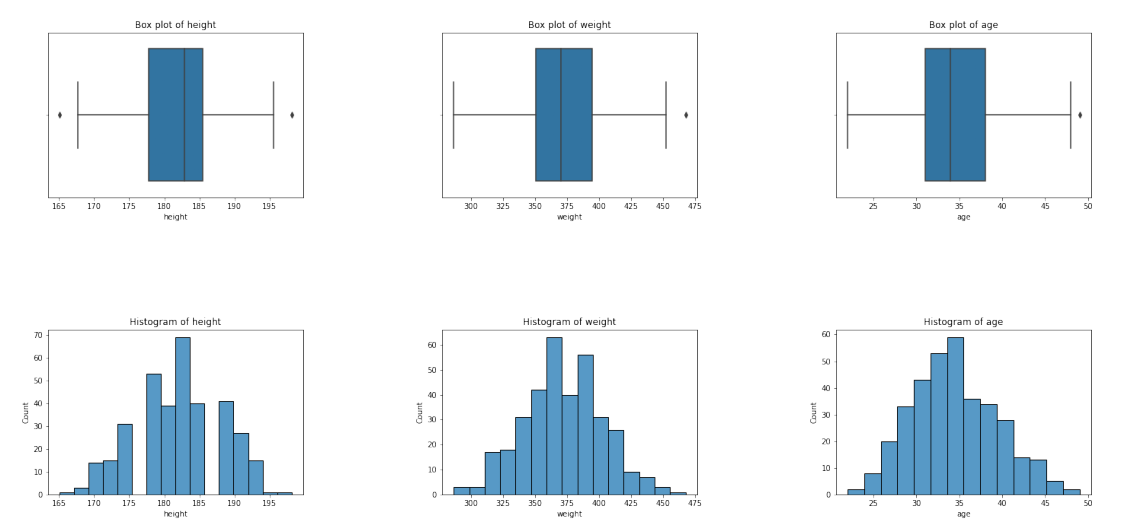

In [31]:
gs=GridSpec(2,3)
fig=plt.figure(figsize=(20, 20))

for index, attribute in enumerate(['height','weight','age']):

    

    ax1=fig.add_subplot(gs[0:2,index:index+1])
    ax2=fig.add_subplot(gs[1:2,index:index+1])

    ax1.set_axis_off()
    ax2.set_axis_off()

    boxplot_img=plt.imread(str(attribute)+'_boxplot'+'.png')
    hist_img=plt.imread(str(attribute)+'_hist'+'.png')
    ax1.imshow(boxplot_img)
    ax2.imshow(hist_img)

From the graphs we can see that the 'age' attribute has a median more to the left of the distribution, indicating a positive slant. In other words, there is an exponential loss of athletes after 34 years of age in world football.
As expected, the 'height' attribute has outliers in its data. For example, we have heights above 195 and below 167.5.